In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=18bc2KtjBJONh-sZ3fAUulW8az_bBQrPp')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.shape

(550, 7)

О скольки книгах хранит данные датасет? Ответ: 550

In [4]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первичное исследование данных

In [5]:
pd.isnull(data).sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Есть ли в каких либо переменных пропуски? (Да/Нет)

Ответ: Нет

In [6]:
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры?

Ответ: Non Fiction, Fiction

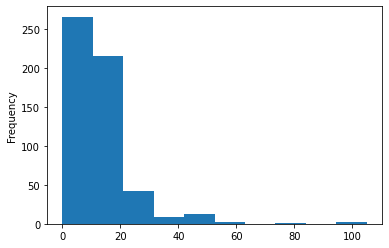

In [7]:
data['price'].plot(kind = 'hist')
plt.show()

In [8]:
print(data['price'].min())
print(data['price'].max())
print(data['price'].mean())
print(data['price'].median())

0
105
13.1
11.0


Mаксимальная цена? Ответ: 105

Минимальная цена? Ответ: 0

Средняя цена? Ответ: 13.1

Медианная цена? Ответ: 11.0

# Поиск и сортировка данных

In [9]:
max_rate = data['user_rating'].max()
print(max_rate)

with_max_rate = data[data['user_rating'] == max_rate]
print(with_max_rate.shape)

print(data[data['reviews'] == data['reviews'].max()]['name'])

top_50_2015 = data[data['year'] == 2015]
print(top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]['name'])

4.9
(52, 7)
534    Where the Crawdads Sing
Name: name, dtype: object
277    Publication Manual of the American Psychologic...
Name: name, dtype: object


In [10]:
top_50_2010 = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')]
print(top_50_2010.shape[0])


20


In [11]:
top_2010_2011 = data[(data['year'] == 2010) | (data['year'] == 2011)]
top_with_max_rate = with_max_rate.isin(top_2010_2011)
print(data[top_with_max_rate].dropna().shape[0])

1


Какой рейтинг в датасете наивысший? **Ответ: 4.9**

Сколько книг имеют такой рейтинг? **Ответ:52**

У какой книги больше всего отзывов? **Ответ: Where the Crawdads Sing**

Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? **Ответ: Publication Manual of the American Psychologic...**

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? **Ответ:20**

Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? **Ответ: 1**

In [18]:
data[data['year'] == 2015].sort_values('price').where(data['price'] < 8).dropna()
#data[(data['year'] == 2015) & (data['price'] < 8)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234.0,0.0,2015.0,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990.0,4.0,2015.0,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673.0,4.0,2015.0,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038.0,4.0,2015.0,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022.0,4.0,2015.0,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323.0,4.0,2015.0,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546.0,5.0,2015.0,Fiction
224,Love You Forever,Robert Munsch,4.8,18613.0,5.0,2015.0,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360.0,5.0,2015.0,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235.0,5.0,2015.0,Non Fiction


Какая книга последняя в отсортированном списке? **Ответ:Old School (Diary of a Wimpy Kid #10)	**

# Агрегирование данных и соединения таблиц

In [23]:
grouped_by_genre = data.groupby(['genre'])['price'].agg(['min', 'max'])
print(grouped_by_genre.head())

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Максимальная цена для жанра Fiction: **Ответ: 82**

Минимальная цена для жанра Fiction: **Ответ: 0**

Максимальная цена для жанра Non Fiction: **Ответ: 105**

Минимальная цена для жанра Non Fiction: **Ответ: 0**

In [33]:
grouped_by_author = data.groupby(['author'])['name'].agg('count')
grouped_by_author.shape[0]

248

Какой размерности вышла таблица? **Ответ: 248 (Series)**

In [43]:
grouped_by_author.sort_values(ascending = False).head(1)

author
Jeff Kinney    12
Name: name, dtype: int64

У какого автора больше всего книг? **Ответ: Jeff Kinney**

Сколько книг у этого автора? **Ответ: 12**

In [46]:
grouped_by_rate = data.groupby('author')['user_rating'].agg('mean').sort_values()
grouped_by_rate.head(1)

author
Donna Tartt    3.9
Name: user_rating, dtype: float64

У какого автора средний рейтинг минимальный? **Ответ: Donna Tartt**

Какой у этого автора средний рейтинг? **Ответ: 3.9**

In [59]:
count_and_avgrate =  pd.concat([grouped_by_rate, grouped_by_author], axis = 1)
count_and_avgrate.columns = ['avg_rating', 'books_count']
count_and_avgrate.sort_values(['avg_rating', 'books_count'], ascending = [True, True]).head()

,avg_rating,books_count
author,,
Donna Tartt,3.9,2
Muriel Barbery,4.0,1
Gillian Flynn,4.0,3
Gallup,4.0,9
Ian K. Smith M.D.,4.1,1


Какой автор первый в списке? **Ответ: Donna Tartt**